In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
print(df.head())
check_values = df['diagnosis']


(569, 33)
         id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]


In [2]:
df = df.drop(['diagnosis','id','Unnamed: 32'], axis=1)
df.head()
df_pca = df

In [3]:
# we know that we want to have two clusters, but if we didn't we would try 
# an elbow graph:

# Perform K-Means Clustering on the Dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)
labels = kmeans.labels_

In [4]:
#add labels to df
df['clusters']=labels
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.clusters
comparison_df = pd.concat([check_values,df.clusters],axis=1)
comparison_df.head()

,diagnosis,clusters
0,M,0
1,M,0
2,M,0
3,M,1
4,M,0


In [6]:
#Turning the Ms into 0s and the Bs into 1s
M0 = pd.Series(check_values.replace(['M',"B"],[0,1]))
#adding to my original"comparison_df"
comparison_df = pd.concat([comparison_df,M0],axis=1)

In [7]:
#Checking df:
comparison_df.head()

,diagnosis,clusters,diagnosis
0,M,0,0
1,M,0,0
2,M,0,0
3,M,1,0
4,M,0,0


In [8]:
#change the name of the last column:
comparison_df.columns = ['diagnosis','clusters','M0']
comparison_df.head()

,diagnosis,clusters,M0
0,M,0,0
1,M,0,0
2,M,0,0
3,M,1,0
4,M,0,0


In [9]:
correct = len(comparison_df[comparison_df['M0'] == comparison_df['clusters']])
total = len(df)
print(correct,total, correct/total)
#Success rate of 85%... not bad lets see how it works out with PCA

486 569 0.8541300527240774


In [10]:
##### Your Code Here #####
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Turn my initial data frame into an array
np_data = array(df_pca)

#Standardize the data:
scaler = StandardScaler()
norm_data = scaler.fit_transform(np_data)

#Create pca instance
# The parameter = 2 because I only want the first two variables first
pca = PCA(2)

#Fit on data
pca.fit(norm_data)

#access value and vectors:
eigenvecs= pca.components_
eigenvals = pca.explained_variance_

#transform data:
#Right now we have the eigenvecs and vals calculated
#for the values fed in, but we haven't actually generated
#principal component variables. Here is when we create them:

pca_vals = pca.transform(norm_data)
pca_vals

array([[ 9.32458357,  2.15004105],
       [ 2.80075393, -3.87551183],
       [ 6.00963721, -1.0251781 ],
       ...,
       [ 1.16121013, -1.70080373],
       [10.48213445,  1.96271873],
       [-5.45445088, -0.89170135]])

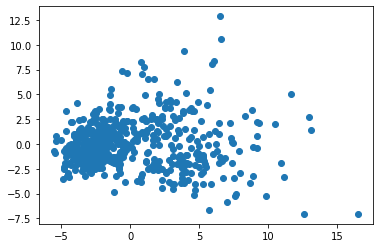

In [11]:
plt.scatter(pca_vals[:,0],pca_vals[:,1])

In [12]:
#I already have this object
kmeans_pca1 = KMeans(n_clusters= 2)
kmeans_pca1.fit(pca_vals)
labels = kmeans.labels_
labels

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [13]:
check_vals = array(M0)
#Here is a better way to check this method:
sum(check_vals == labels)


486

In [14]:
def scree_plot(pca):
   
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=10)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

(569, 31)
[0.44597568 0.63481398 0.72577839 0.78969636 0.84302199 0.88196949
 0.90378241 0.9193525  0.9337333  0.94549651 0.95585931 0.96430234
 0.97239035 0.97921628 0.98411009]


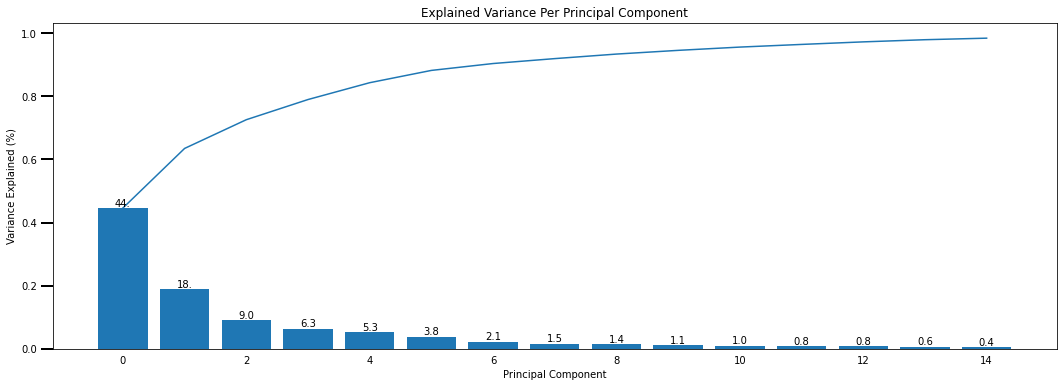

In [15]:
#Create pca instance
#More parameters this time:
pca = PCA(15)
#I can have up to PCA 30 because that is the number of columns I have 
print(norm_data.shape)

#Fit on data
pca.fit(norm_data)

vals = pca.explained_variance_ratio_
agg = np.cumsum(vals)
print(agg)
#access value and vectors:
eigenvecs= pca.components_
eigenvals = pca.explained_variance_

scree_plot(pca)
#We hit 90 on the 7nth pca component